# Feedforward Neural Network

## Exercise Questions

### Q1
Implement a two layer feed forward networl for XOR Logic Gate using sigmoid fcn

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

In [2]:
losses = []
torch.manual_seed(42)

torch.cuda.is_available()

True

In [3]:
x = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y = torch.tensor([0,1,1,0], dtype = torch.float32)

In [4]:
class xor(nn.Module):
    def __init__(self):
        super(xor,self).__init__()
        self.l1 = nn.Linear(2,2,bias=True)
        self.sig1 = nn.Sigmoid()
        self.l2 = nn.Linear(2,1,bias = True)
        self.sig2 = nn.Sigmoid()
    def forward(self, x):
        x = self.l1(x)
        x = self.sig1(x)
        x = self.l2(x)
        #x = self.sig2(x)
        return x

In [5]:
class mydata(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, id):
        return self.x[id].to(torch.device("cuda")), self.y[id].to(torch.device("cuda"))

In [6]:
data = mydata(x,y)
batch = 1
loader = DataLoader(data, batch_size = batch, shuffle = True)
device = torch.device("cuda")
model = xor().to(device)
print(model)

xor(
  (l1): Linear(in_features=2, out_features=2, bias=True)
  (sig1): Sigmoid()
  (l2): Linear(in_features=2, out_features=1, bias=True)
  (sig2): Sigmoid()
)


In [7]:
loss = torch.nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr = 0.03)

epoch: 0
Loss:0.301132844761014

epoch: 1000
Loss:0.27038102224469185

epoch: 2000
Loss:0.27022553235292435

epoch: 3000
Loss:0.26847536861896515

epoch: 4000
Loss:0.26516806334257126

epoch: 5000
Loss:0.22409657016396523

epoch: 6000
Loss:0.0001402673997290549

epoch: 7000
Loss:1.2700951401711791e-11

epoch: 8000
Loss:3.2152058793144533e-12

epoch: 9000
Loss:3.0020430585864233e-12



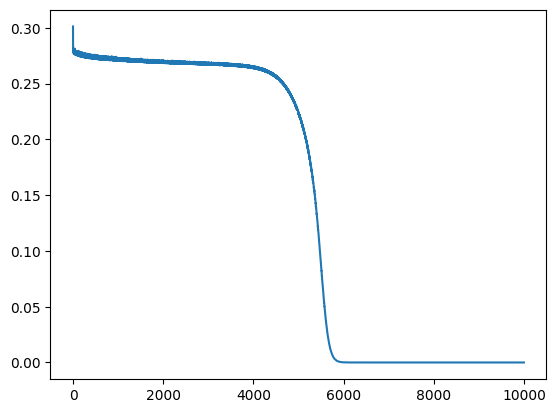

In [8]:
def train_one_epoch(index):
    total = 0
    for i, data in enumerate(loader):
        inputs, labels = data
        optim.zero_grad()
        outputs = model(inputs)
        l = loss(outputs.flatten(), labels)
        l.backward()
        optim.step()
        total += l.item()
    return total/len(loader)/batch

losses = []
epochs = 10000
for epoch in range(epochs):
    model.train(True)
    l = train_one_epoch(model)
    losses.append(l)
    if epoch%1000==0:
        print(f"epoch: {epoch}\nLoss:{l}\n")

plt.plot(losses)

In [9]:
def sigmoid(x):
    return 1.0/(1+torch.exp(-x))
    
test = torch.tensor([0,0], dtype = torch.float32).to(device)
answer = 1
layer1 = torch.matmul(model.l1.weight, test) + model.l1.bias
layer1 = sigmoid(layer1)
layer2 = torch.matmul(model.l2.weight, layer1) + model.l2.bias
layer2 = sigmoid(layer2)
print(layer2)

tensor([0.5000], device='cuda:0', grad_fn=<MulBackward0>)


In [10]:
#checking model parameters

for param in model.named_parameters():
    print(param)

('l1.weight', Parameter containing:
tensor([[-1.9767,  2.0750],
        [-3.0809,  3.3435]], device='cuda:0', requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.7012, -2.5002], device='cuda:0', requires_grad=True))
('l2.weight', Parameter containing:
tensor([[-2.6653,  2.7713]], device='cuda:0', requires_grad=True))
('l2.bias', Parameter containing:
tensor([1.5715], device='cuda:0', requires_grad=True))


### Q2
Repeat Q1 with activation function ReLU

In [11]:
class xor(nn.Module):
    def __init__(self):
        super(xor,self).__init__()
        self.l1 = nn.Linear(2,2,bias=True)
        self.r1 = nn.ReLU()
        self.l2 = nn.Linear(2,1,bias = True)
        self.r2 = nn.ReLU()
    def forward(self, x):
        x = self.l1(x)
        x = self.r1(x)
        x = self.l2(x)
        #x = self.sig2(x)
        return x

In [12]:
model = xor().to(device)
print(model)

xor(
  (l1): Linear(in_features=2, out_features=2, bias=True)
  (r1): ReLU()
  (l2): Linear(in_features=2, out_features=1, bias=True)
  (r2): ReLU()
)


epoch: 0
Loss:0.2442370504140854

epoch: 1000
Loss:0.2442370504140854

epoch: 2000
Loss:0.2442370504140854

epoch: 3000
Loss:0.2442370504140854

epoch: 4000
Loss:0.2442370504140854

epoch: 5000
Loss:0.2442370504140854

epoch: 6000
Loss:0.2442370504140854

epoch: 7000
Loss:0.2442370504140854

epoch: 8000
Loss:0.2442370504140854

epoch: 9000
Loss:0.2442370504140854



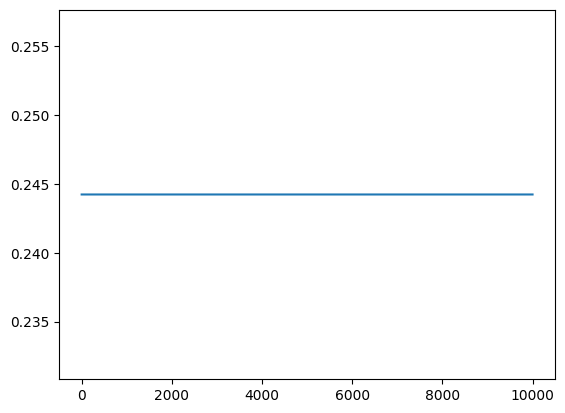

In [13]:
losses = []
epochs = 10000
for epoch in range(epochs):
    model.train(True)
    l = train_one_epoch(model)
    losses.append(l)
    if epoch%1000==0:
        print(f"epoch: {epoch}\nLoss:{l}\n")

plt.plot(losses)

In [14]:
print(model.l1.weight, model.l1.bias)
print(model.l2.weight, model.l2.bias)

Parameter containing:
tensor([[ 0.5116, -0.6022],
        [ 0.2503, -0.6092]], device='cuda:0', requires_grad=True) Parameter containing:
tensor([-0.3227,  0.4751], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0724, 0.2112]], device='cuda:0', requires_grad=True) Parameter containing:
tensor([0.4477], device='cuda:0', requires_grad=True)


In [15]:
def relu(x):
    return torch.max(torch.tensor(0), x)

In [16]:
test = torch.tensor([0,0], dtype = torch.float32).to(device)
answer = 1
layer1 = torch.matmul(test,model.l1.weight.T) + model.l1.bias
layer1 = relu(layer1)
layer2 = torch.matmul(layer1, model.l2.weight.T) + model.l2.bias
layer2 = relu(layer2)
print(layer2)

tensor([0.5481], device='cuda:0', grad_fn=<MaximumBackward0>)


In [17]:
model(torch.tensor([0,0], dtype = torch.float32).to(device))

tensor([0.5481], device='cuda:0', grad_fn=<ViewBackward0>)

### Q4
Implement a FFN with two hidden layers classifying digits in MNIST dataset.

In [18]:
import torchvision
import torchvision.transforms as transforms

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [20]:
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [21]:
# Import MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [22]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [23]:
examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')